## Observations and Insights 

## Dependencies and Setup

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.tail()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4
1892,b879,45,72.555239,2


In [5]:
#messing around with naming protocols
merge_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_data.head()               

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
number_mice = len(merge_data["Mouse ID"].unique())
number_mice

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merge_data.loc[merge_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
test = merge_data[merge_data["Mouse ID"] == "g989"]
test

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_data[merge_data[ "Mouse ID" ].isin(duplicate_mouse) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
mouse_count=len(clean_df["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [12]:
# Generate a ~summary statistics table~ of mean, median, variance, standard deviation, and SEM 
# of the ~tumor volume~ for each regimen

drug_regimen = merge_data.groupby (["Drug Regimen"])
drug_regimen

tumor_volume = drug_regimen ["Tumor Volume (mm3)"].sum()

#Mean
drug_mean = drug_regimen ["Tumor Volume (mm3)"].mean()

#Median
drug_median = drug_regimen ["Tumor Volume (mm3)"].median()

#Variance
drug_variance = drug_regimen ["Tumor Volume (mm3)"].var()

#StDeviation
drug_stdev = drug_regimen ["Tumor Volume (mm3)"].std()

#SEM tumor volume for each regimen
drug_sem = drug_regimen ["Tumor Volume (mm3)"].sem()
                         
# This method is the most straighforward, creating multiple series and putting them all 
# together at the end.



In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_statistics_table = pd.DataFrame ({
    "Mean": drug_mean,
    "Median": drug_median,
    "Variance": drug_variance,
    "Standard Deviation": drug_stdev,
    "SEM": drug_sem,    
    
})

summary_statistics_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

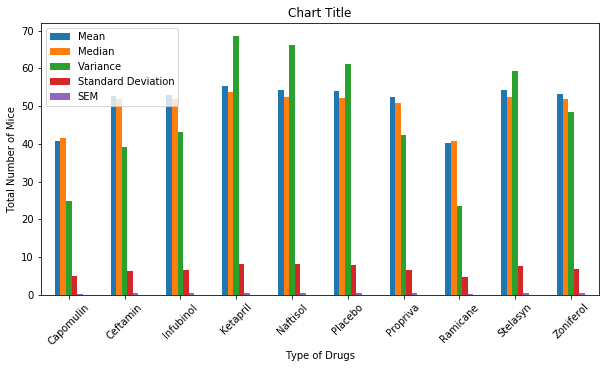

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the ~~total number of mice~~ for ~~each treatment~~ throughout the course of the study using pandas. 
summary_statistics_table.plot(kind="bar", figsize=(10,5)) 

#titles
plt.title("Chart Title")
plt.ylabel("Total Number of Mice")
plt.xlabel("Type of Drugs")
plt.xticks(rotation=45)
          
plt.show()
plt.tight_layout()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

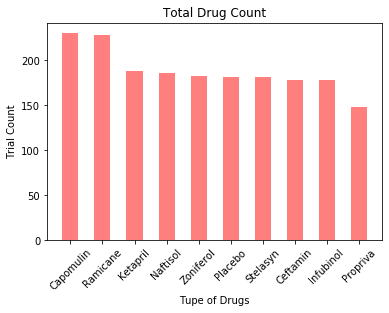

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_treatment = clean_df["Drug Regimen"].value_counts()

y_axis = drug_treatment.values
x_axis = np.arange(0,len(y_axis),1)
x_drugs= drug_treatment.index

plt.bar(x_drugs, y_axis, color = 'r', alpha = 0.5, align = "center", width =.5)

plt.ylabel("Trial Count")
plt.xlabel("Tupe of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=45)

drug_treatment


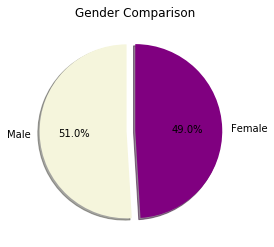

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf_count = clean_df["Sex"].value_counts()

labels=mf_count.values

sizes=mf_count.values
colors=['beige', 'purple']
#tried to do the the northwestern colors lol

explode = [0.1,0]

mf_count.plot(kind="pie", explode = explode, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 90)

plt.title("Gender Comparison")
plt.ylabel (" ")
plt.show()

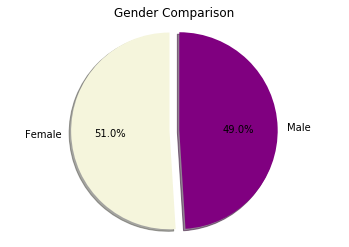

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female', 'Male'
sizes = [51, 49]
colors = ['beige', 'purple']
explode = (0, 0.1,)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Gender Comparison")

plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#The four treatment regimens
the_final_four = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
the_final_four = merge_data[merge_data['Drug Regimen'].isin(the_final_four)]
the_final_four.head(5)
                   

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
the_final_four = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
the_final_four    

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [20]:
# Create empty list to fill with tumor vol data (for plotting)
#the_final_four_
#the_final_four_

In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
capomulin = merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = merge_data.loc[merge_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = merge_data.loc[merge_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = merge_data.loc[merge_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']    



In [22]:
#Capomulin
quartile_cap = capomulin.quantile([.25,.5,.75])
lower_cap = quartile_cap[.25]
upper_cap = quartile_cap[.75]
iqr = upper_cap-lower_cap

lower_ocap = lower_cap - (1.5*iqr)
upper_ocap = upper_cap + (1.5*iqr)

print(f"Capomulin potential outliers could be be values {lower_ocap} and above {upper_ocap} could be outliers.")

Capomulin potential outliers could be be values 26.714832162499995 and above 55.9711007025 could be outliers.


In [23]:
#Infubinol
quartile_in = infubinol.quantile([.25,.5,.75])
lower_in = quartile_in[.25]
upper_in = quartile_in[.75]
iqr = upper_in-lower_in

lower_oin = lower_in - (1.5*iqr)
upper_oin = upper_in + (1.5*iqr)

print(f"Infubinol potential outliers could be be values {lower_oin} and above {upper_oin} could be outliers.")

Infubinol potential outliers could be be values 32.309217298749985 and above 72.31757996875001 could be outliers.


In [24]:
#Ramicane
quartile_ram = ramicane.quantile([.25,.5,.75])
lower_ram = quartile_ram[.25]
upper_ram = quartile_ram[.75]
iqr = upper_ram-lower_ram

lower_oram = lower_ram - (1.5*iqr)
upper_oram = upper_ram + (1.5*iqr)

print(f"Ramicane potential outliers could be be values {lower_oram} and above {upper_oram} could be outliers.")

Ramicane potential outliers could be be values 24.18658646249998 and above 57.48804812250001 could be outliers.


In [25]:
#Ceftmain
quartile_cef = ceftamin.quantile([.25,.5,.75])
lower_cef = quartile_cef[.25]
upper_cef = quartile_cef[.75]
iqr = upper_cef-lower_cef

lower_ocef = lower_cef - (1.5*iqr)
upper_ocef = upper_cef + (1.5*iqr)

print(f"Ceftmain potential outliers coul be be values {lower_ocef} and above {upper_ocef} could be outliers.")

Ceftmain potential outliers coul be be values 32.818911426250004 and above 71.19095325625 could be outliers.


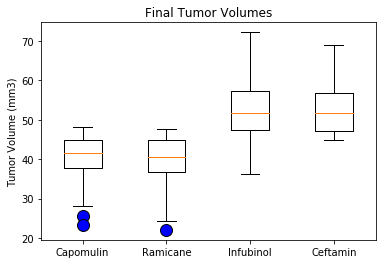

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor = 'blue', markersize = 12)

plt.boxplot ([capomulin, ramicane, infubinol, ceftamin], labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops = orange_out)

plt.title ("Final Tumor Volumes")
plt.ylabel ("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

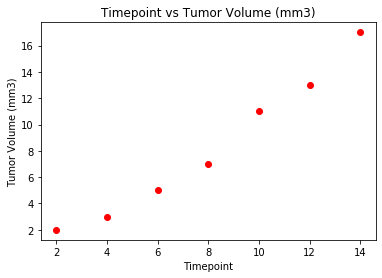

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = merge_data_df.loc[merge_data_df["Drug Regimen"]== "Capomulin"]
mouse = merge_data_df.loc[merge_data_df["Mouse ID"] == "1509"]


x = np.linspace(0, 5, 40)

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.scatter(range(2,15,2), [2, 3, 5, 7, 11, 13, 17,], c="r")

plt.title ("Timepoint vs Tumor Volume (mm3)")
plt.show()

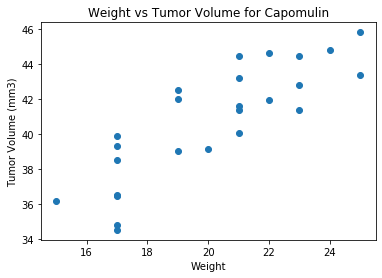

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

cap_avg = capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

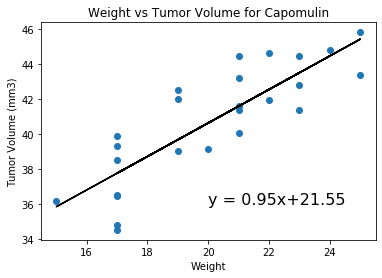

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values = cap_avg["Weight (g)"]*slope + intercept
line_eq = f"y = {round(slope, 2)}x+{round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.plot(cap_avg["Weight (g)"], regress_values, color='black')
plt.annotate(line_eq,(20,36), color="black", fontsize = 16)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Weight vs Tumor Volume for Capomulin")
plt.show()

#StackOverflow is saying to put a comma between the tuples but in this case
#I am not sure where the comma will go

In [30]:
print(f"Correlation between these two variables is {round(rvalue,2)}")

Correlation between these two variables is 0.84
